In [2]:
import pandas as pd
from tqdm import tqdm
from hopfield import *

In [3]:
# n nodes
# k images
# see if the images are fixed pts (not necessarily stable)
max_num_nodes_to_test = 100
remembrance_threshold = 0.05
number_of_trials_per_num_nodes = 50

In [4]:
def check_remembrance(network: Hopfield, image: np.array):
    network.values = image
    updated_values = network.do_synchronous_update()
    hamming_distance = network.hamming_distance(updated_values, image)
    try:
        assert hamming_distance <= int(0.05 * network.n)
        return True
    except AssertionError:
        # print(hamming_distance)
        return False

In [5]:
def check_multiple_remembrances(network: Hopfield, images: list[np.array]):
    for image in images:
        if not check_remembrance(network, image):
            return False
    return True

In [6]:
def find_how_many_images_network_can_store_with_n_nodes(n: int):
    remembrance_data = []
    network = Hopfield(shape = (n, 1))
    network.train_on_values()
    images_trained_on = [np.array(network.values)]
    remembrance_data.append(check_multiple_remembrances(network, images_trained_on))

    while remembrance_data[-1] is True:
        random_image = network.generate_random_image()
        network.train_on_new(random_image)
        images_trained_on.append(random_image)
        remembrance_data.append(check_multiple_remembrances(network, images_trained_on))

    return len(remembrance_data) - 1

In [7]:
print(find_how_many_images_network_can_store_with_n_nodes(100))

22


In [8]:
num_images_remembered = {n: [] for n in range(2, max_num_nodes_to_test + 1)}

for n in tqdm(range(2, max_num_nodes_to_test + 1)):
    for _ in range(number_of_trials_per_num_nodes):
        num_images_remembered[n].append(find_how_many_images_network_can_store_with_n_nodes(n))

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [06:05<00:00,  3.69s/it]


In [9]:
num_images_remembered

{2: [1,
  1,
  1,
  1,
  2,
  1,
  1,
  2,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  3,
  3,
  4,
  4,
  2,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  3,
  3,
  1,
  1,
  1,
  3,
  1,
  1,
  1,
  1,
  1,
  1,
  6,
  1,
  1],
 3: [1,
  2,
  1,
  2,
  1,
  1,
  2,
  1,
  2,
  2,
  1,
  1,
  3,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  3,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  1,
  1,
  2,
  1,
  2,
  3,
  2,
  1,
  3,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  1,
  1,
  2],
 4: [2,
  1,
  1,
  2,
  1,
  3,
  2,
  2,
  2,
  3,
  2,
  1,
  2,
  2,
  1,
  1,
  2,
  1,
  2,
  3,
  2,
  3,
  3,
  3,
  2,
  2,
  2,
  1,
  2,
  1,
  3,
  2,
  1,
  1,
  2,
  3,
  2,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  2,
  2,
  3,
  2,
  1,
  2],
 5: [2,
  2,
  3,
  2,
  2,
  2,
  2,
  3,
  1,
  3,
  2,
  3,
  1,
  3,
  3,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  4,
  1,
  2,
  2,
  1,
  3,
  2,
  2,


[0.21701942 0.56978743]


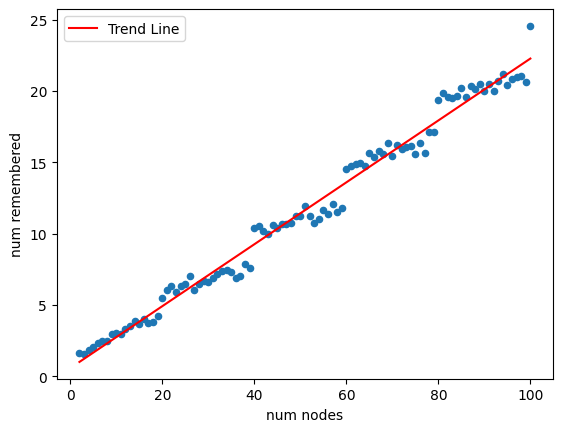

In [10]:
interpreted_data = {"num remembered": [sum(num_images_remembered[n]) / len(num_images_remembered[n]) for n in num_images_remembered.keys()], "num nodes": [n for n in num_images_remembered.keys()]}
dataframe = pd.DataFrame(interpreted_data)

fit = np.polyfit(pd.to_numeric(interpreted_data["num nodes"]), pd.to_numeric(interpreted_data["num remembered"]), 1)
line = np.poly1d(fit)
dataframe.insert(1, "Trend Line", line(pd.to_numeric(interpreted_data["num nodes"])))
# print(interpreted_data)
# print(dataframe)
ax = dataframe.plot(x="num nodes", y="num remembered", kind="scatter")
dataframe.plot(x="num nodes", y="Trend Line", ax=ax, color="Red")
print(fit)